In [1]:
# 첫번째 예시는 기존에 주어졌던 바와 같이 임의로 데이터를 작성하고, 
# 이에 따른 w를 계산하는 것이다.

In [2]:
import numpy as np

In [3]:
x_data=[1.0,2.0,3.0]
y_data=[3.0,6.0,9.0]
w=np.random.randn()

In [4]:
def forward(x):
    return x*w
def loss(x,y):
    y_pred=forward(x)
    return (y_pred-y)**2
def gradient(x,y):
    return 2*x*(x*w-y)

In [5]:
list(zip(x_data,y_data))

[(1.0, 3.0), (2.0, 6.0), (3.0, 9.0)]

In [6]:
w_temp=[]
l_temp=[]
for epoch in range(100):
    for x_val, y_val in zip(x_data,y_data):
        grad = gradient(x_val,y_val)
        w = w - 0.01*grad
        print("\tgrad:",x_val,y_val,grad)
        l=loss(x_val,y_val)
        if epoch>1:
            w_temp.append(w)
            l_temp.append(l)
    print("progress:",epoch,"w=",w,"loss=",l)
print("predict(after training)","4 hours", forward(4))

	grad: 1.0 3.0 -9.34335367913179
	grad: 2.0 6.0 -36.62594642219661
	grad: 3.0 9.0 -75.81570909394699
progress: 0 w= -0.45382674761314057 loss= 107.36027282275168
	grad: 1.0 3.0 -6.907653495226281
	grad: 2.0 6.0 -27.07800170128702
	grad: 3.0 9.0 -56.05146352166413
progress: 1 w= 0.4465444395686339 loss= 58.681217691880754
	grad: 1.0 3.0 -5.1069111208627325
	grad: 2.0 6.0 -20.01909159378191
	grad: 3.0 9.0 -41.43951959912855
progress: 2 w= 1.112199662706366 loss= 32.074111021373625
	grad: 1.0 3.0 -3.775600674587268
	grad: 2.0 6.0 -14.800354644382091
	grad: 3.0 9.0 -30.63673411387093
progress: 3 w= 1.604326557034769 loss= 17.5311392345858
	grad: 1.0 3.0 -2.791346885930462
	grad: 2.0 6.0 -10.942079792847412
	grad: 3.0 9.0 -22.650105171194145
progress: 4 w= 1.968161875534489 loss= 9.58220923590453
	grad: 1.0 3.0 -2.063676248931022
	grad: 2.0 6.0 -8.089610895809606
	grad: 3.0 9.0 -16.745494554325887
progress: 5 w= 2.237149692525154 loss= 5.237465324530201
	grad: 1.0 3.0 -1.5257006149496917
	g

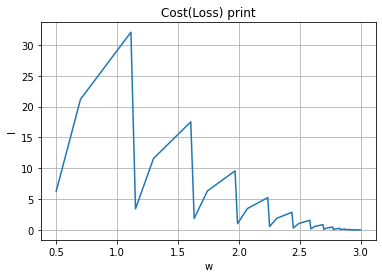

In [7]:
import matplotlib.pyplot as plt
plt.plot(w_temp,l_temp)
plt.title("Cost(Loss) print")
plt.xlabel("w")
plt.ylabel("l")
plt.grid()

In [8]:
# 두번째는 House price example에 대한 공개자료를 토대로 여러 feature들로부터
# House price를 예측하는 선형 모델을 구축하는 것인데, 
# 선형 모델의 복잡도가 너무 떨어져서 loss가 수렴하지 않는 결과를 낳았다.

In [9]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

In [10]:
train_data=pd.read_csv("House_price_example.csv")

# Out lier 제거
data_idx=train_data["GrLivArea"]<4000
train_data=train_data[data_idx]

In [11]:
y_data=train_data["SalePrice"].values

In [12]:
feature_list = ["LotArea", "YearBuilt", "YearRemodAdd", "TotalBsmtSF",
    "GrLivArea", "1stFlrSF", "2ndFlrSF", "BedroomAbvGr", 
    "KitchenAbvGr", "Fireplaces", "GarageArea", "WoodDeckSF", 
    "HalfBath", "TotRmsAbvGrd", "OverallCond", "OverallQual"]

In [13]:
x_data=train_data[feature_list].to_numpy()

In [14]:
x_data

array([[ 8450,  2003,  2003, ...,     8,     5,     7],
       [ 9600,  1976,  1976, ...,     6,     8,     6],
       [11250,  2001,  2002, ...,     6,     5,     7],
       ...,
       [ 9042,  1941,  2006, ...,     9,     9,     7],
       [ 9717,  1950,  1996, ...,     5,     6,     5],
       [ 9937,  1965,  1965, ...,     6,     6,     5]])

In [15]:
x_data=torch.FloatTensor(x_data)
y_data=torch.FloatTensor(y_data)
model=nn.Linear(len(feature_list),1)

In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [17]:
import time
nb_epochs = 1000
start = time.time()
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_data))
    cost = F.mse_loss(prediction, y_data) 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))
print("time:{:.6f} s".format(time.time()-start))

Epoch    0/1000 Cost: 37529141248.000000
Epoch  100/1000 Cost: nan
Epoch  200/1000 Cost: nan
Epoch  300/1000 Cost: nan
Epoch  400/1000 Cost: nan
Epoch  500/1000 Cost: nan
Epoch  600/1000 Cost: nan
Epoch  700/1000 Cost: nan
Epoch  800/1000 Cost: nan
Epoch  900/1000 Cost: nan
Epoch 1000/1000 Cost: nan
time:3.680020 s
